In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
pip install Sastrawi

In [11]:
import json
import nltk
nltk.download('punkt')
import pandas as pd
import re,string
from nltk.tokenize import word_tokenize
from string import digits

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
def read_data():
  #data_train
  with open('drive/My Drive/Colab Notebooks/data_latih.json', 'r') as myfile:
    data=myfile.read()
  obj = json.loads(data)
  #data kamus
  data_dict=pd.read_csv("drive/My Drive/Colab Notebooks/dictionary.csv")
  #key norm
  data_key=pd.read_csv("drive/My Drive/Colab Notebooks/key_norm.csv")
  #stop word
  data_stop = set(open('stopword_list_TALA.txt'))
  return obj,data_dict,data_key,data_stop

In [0]:
def split_isi_sent(obj):
  data=[]
  for i in range(len(obj)):
    data.append(obj[i]['isi'])
  sentiment=[]
  for i in range(len(obj)):
    sentiment.append(obj[i]['sentimen'])
  return data,sentiment

In [0]:
def strip_links(text):
    link_regex    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links         = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,'')
            text = text.lower()
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)
def ubah_kata(text,kamus):
  text=word_tokenize(text)
  kata_hasil=[]
  for kata in text:
    if (kata in kamus)==True:
      kata_hasil.append(kamus_saya.get(kata))
    else:
      kata_hasil.append(kata)
  #print(kata_hasil)
  return kata_hasil
def token_kata(text,data_stop):
  #text=word_tokenize(text)
  hasil_baris=[]
  filtered_sentence = [w for w in data1 if not w in data_stop]
  for w in text: 
    if w+"\n" not in data_stop:
      if w != '':
        if not w.isdigit():
          hasil_baris.append(w)
  return hasil_baris
def stemming_data(text):
  from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  kalimat_stem = []
  for i in text:
    i = stemmer.stem(i)
    kalimat_stem.append(i)
  return kalimat_stem

In [50]:
obj,data_dict,data_key,data_stop=read_data()
data,sentiment=split_isi_sent(obj)
data1=[]
data_ubah=[]
data_final=[]
data_stem=[]
#Menghapus tanda baca, link, username
print("delete punctuation, link, username......")
for t in data:
  data1.append(strip_all_entities(strip_links(t)))
#Mengubah kata tidak baku
print("key normalization......")
kamus_saya=dict(zip(data_key['singkat'],data_key['hasil']))
for j in data1:
  data_ubah.append(ubah_kata(j,kamus_saya))
#stemmer
print("stemming.......")
for k in data_ubah:
  data_stem.append(stemming_data(k))
#Menghapus stopword
print("delete stopwords.......")
for data in data_stem:
  data_final.append(token_kata(data,data_stop))
print(data_final)

delete punctuation, link, username......
key normalization......
stemming.......
delete stopwords.......
[['penasaran', 'pilih', 'ak'], ['layan', 'warga', 'lahir', 'program'], ['golong', 'sumbu', 'pendek', 'fpi', 'piara', 'keluarga', 'cendana', 'bibib', 'risiek', 'ulama', 'mesum', 'demo', 'kerja'], ['didzolimi', 'bebas'], ['prof', 'edward', 'omar', 'sharif', 'h', 'ahli', 'pidana', 'pndpt', 'ahli', 'unsur', 'pasal', '156a', 'kuhp'], ['didzolimi', 'bebas'], ['gaul', 'badai', 'tata', 'kota'], ['penasaran', 'pilih', 'ak'], ['surah', 'al', 'maidah', 'arti', 'umat', 'pilih', 'pimpin', 'muslim'], ['penjarabersih2', 'penjara', 'biar'], ['tunggu', 'program', 'unggul'], ['didzolimi', 'bebas'], ['ikuuut'], ['warga', 'negara', 'republik', 'indonesia', 'sosok'], ['wkwkwkada', 'udang', 'dbalik', 'batu'], ['dzolimi', 'bgmana', 'jelazz', 'mendolimi', 'umat', 'islamsampean', 'sehat'], ['contoh', 'analogi', 'orang', 'curi', 'indonesia', 'dasar', 'hukum', 'positif', 'hukum', 'pidana', 'penjara'], ['nista

In [51]:
from nltk.probability import FreqDist
fdist=FreqDist()
for sentence in data_final:
  for word in sentence:
    fdist[word]+=1
fdist.most_common(20)

[('warga', 76),
 ('pilih', 45),
 ('program', 38),
 ('bangun', 37),
 ('dukung', 34),
 ('bukti', 32),
 ('kerja', 29),
 ('pimpin', 25),
 ('layan', 20),
 ('rumah', 20),
 ('pilkada', 19),
 ('didik', 19),
 ('moga', 18),
 ('langsung', 18),
 ('orang', 17),
 ('rakyat', 17),
 ('nyata', 17),
 ('kota', 15),
 ('putar', 15),
 ('milik', 15)]

In [52]:
fdist.most_common()

[('warga', 76),
 ('pilih', 45),
 ('program', 38),
 ('bangun', 37),
 ('dukung', 34),
 ('bukti', 32),
 ('kerja', 29),
 ('pimpin', 25),
 ('layan', 20),
 ('rumah', 20),
 ('pilkada', 19),
 ('didik', 19),
 ('moga', 18),
 ('langsung', 18),
 ('orang', 17),
 ('rakyat', 17),
 ('nyata', 17),
 ('kota', 15),
 ('putar', 15),
 ('milik', 15),
 ('sehat', 14),
 ('yuk', 14),
 ('anak', 14),
 ('hati', 13),
 ('islam', 13),
 ('menang', 13),
 ('hasil', 13),
 ('hak', 13),
 ('lihat', 13),
 ('pagi', 13),
 ('tim', 13),
 ('hadir', 13),
 ('butuh', 12),
 ('bersih', 12),
 ('banjir', 12),
 ('bantu', 12),
 ('debat', 12),
 ('bebas', 11),
 ('indonesia', 11),
 ('beda', 11),
 ('hidup', 11),
 ('seru', 11),
 ('percaya', 11),
 ('sungai', 11),
 ('kualitas', 11),
 ('bioskop', 11),
 ('gaul', 10),
 ('tata', 10),
 ('saksi', 10),
 ('keren', 10),
 ('salah', 10),
 ('kampanye', 10),
 ('laku', 10),
 ('pakai', 10),
 ('suara', 10),
 ('sosok', 9),
 ('hukum', 9),
 ('perempuan', 9),
 ('minggu', 9),
 ('ayo', 9),
 ('tonton', 9),
 ('pd', 9),
 

In [0]:
kalimat_final=[]
for kal in data_final:
  kalimat=''
  for kata in kal:
    kalimat=kalimat+' '+kata
  kalimat_final.append(kalimat)
#print(kalimat_final)

In [54]:
kalimat_final

[' penasaran pilih ak',
 ' layan warga lahir program',
 ' golong sumbu pendek fpi piara keluarga cendana bibib risiek ulama mesum demo kerja',
 ' didzolimi bebas',
 ' prof edward omar sharif h ahli pidana pndpt ahli unsur pasal 156a kuhp',
 ' didzolimi bebas',
 ' gaul badai tata kota',
 ' penasaran pilih ak',
 ' surah al maidah arti umat pilih pimpin muslim',
 ' penjarabersih2 penjara biar',
 ' tunggu program unggul',
 ' didzolimi bebas',
 ' ikuuut',
 ' warga negara republik indonesia sosok',
 ' wkwkwkada udang dbalik batu',
 ' dzolimi bgmana jelazz mendolimi umat islamsampean sehat',
 ' contoh analogi orang curi indonesia dasar hukum positif hukum pidana penjara',
 ' nista agama yaa',
 ' kultwit poinpoin saksi ahli sidang yuk simak',
 ' kultwit poinpoin saksi ahli sidang yuk simak',
 ' kultwit poinpoin saksi ahli sidang yuk simak',
 ' kultwit poinpoin saksi ahli sidang yuk simak',
 ' moga unggul putar',
 ' moga unggul putar',
 ' moga unggul putar',
 ' moga unggul putar',
 ' subhanalla

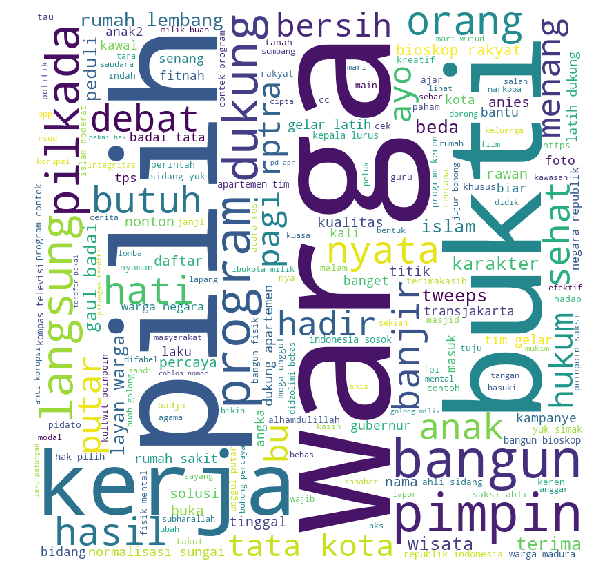

In [55]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
comment_words=''
for kalimat in kalimat_final:
  comment_words=comment_words+kalimat
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer() #menghitung kemunculan kata
features=(vectorizer.fit_transform(kalimat_final).todense()) #representasu fitur
print(vectorizer.vocabulary_)

{'penasaran': 864, 'pilih': 887, 'ak': 29, 'layan': 639, 'warga': 1277, 'lahir': 620, 'program': 920, 'golong': 366, 'sumbu': 1108, 'pendek': 865, 'fpi': 346, 'piara': 883, 'keluarga': 540, 'cendana': 229, 'bibib': 163, 'risiek': 973, 'ulama': 1238, 'mesum': 718, 'demo': 268, 'kerja': 558, 'didzolimi': 277, 'bebas': 127, 'prof': 918, 'edward': 310, 'omar': 814, 'sharif': 1053, 'ahli': 19, 'pidana': 884, 'pndpt': 897, 'unsur': 1247, 'pasal': 845, '156a': 0, 'kuhp': 606, 'gaul': 354, 'badai': 93, 'tata': 1140, 'kota': 593, 'surah': 1112, 'al': 38, 'maidah': 670, 'arti': 82, 'umat': 1239, 'pimpin': 889, 'muslim': 757, 'penjarabersih2': 869, 'penjara': 868, 'biar': 160, 'tunggu': 1222, 'unggul': 1245, 'ikuuut': 430, 'negara': 767, 'republik': 966, 'indonesia': 435, 'sosok': 1089, 'wkwkwkada': 1289, 'udang': 1234, 'dbalik': 263, 'batu': 122, 'dzolimi': 305, 'bgmana': 158, 'jelazz': 481, 'mendolimi': 705, 'islamsampean': 449, 'sehat': 1020, 'contoh': 248, 'analogi': 61, 'orang': 820, 'curi':

In [57]:
frame_feat=pd.DataFrame(features)
frame_feat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
frame_sent=pd.DataFrame(sentiment,columns=['sentiment'])
frame_sent.head()

,sentiment
0,netral
1,positif
2,negatif
3,positif
4,positif


In [59]:
frame_sent['sentiment'] = pd.Categorical(frame_sent['sentiment']).codes
frame_sent.head()

,sentiment
0,1
1,2
2,0
3,2
4,2


In [60]:
data_all = pd.concat([frame_feat, frame_sent],axis=1)
data_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,sentiment
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [0]:
vectorizer.vocabulary_.get('pemimpin')

In [62]:
data_all[data_all[1141]>0]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,sentiment
191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
308,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
345,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
427,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
455,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import argparse

In [0]:
models = {
    "knn": KNeighborsClassifier(n_neighbors=1),
    "naive_bayes": GaussianNB(),
    "logit": LogisticRegression(solver="lbfgs",multi_class="auto"),
    "svm": SVC(kernel="rbf",gamma="auto"),
    "decision_tree": DecisionTreeClassifier(),
    "random_forest": RandomForestClassifier(n_estimators=100),
    "mlp": MLPClassifier(),
}

In [0]:
y = data_all['sentiment'].copy(deep=True)
X = data_all.copy(deep=True)
X.drop(['sentiment'], inplace=True, axis=1)

In [66]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279,1280,1281,1282,1283,1284,1285,1286,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [67]:
y.head()

0    1
1    2
2    0
3    2
4    2
Name: sentiment, dtype: int8

In [0]:
(trainX,testX,trainY,testY)=train_test_split(X,y,test_size=0.2,random_state=12)

In [69]:
model=models["logit"]
model.fit(trainX,trainY)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
predictions=model.predict(testX)
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.45      0.59      0.51        32
           1       0.54      0.37      0.44        35
           2       0.66      0.67      0.66        63

    accuracy                           0.57       130
   macro avg       0.55      0.54      0.54       130
weighted avg       0.58      0.57      0.57       130



In [71]:
model=models["random_forest"]
model.fit(trainX,trainY)
predictions=model.predict(testX)
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.56      0.47      0.51        32
           1       0.47      0.71      0.57        35
           2       0.70      0.56      0.62        63

    accuracy                           0.58       130
   macro avg       0.58      0.58      0.57       130
weighted avg       0.60      0.58      0.58       130



In [72]:
model=models["mlp"]
model.fit(trainX,trainY)
predictions=model.predict(testX)
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.52      0.50      0.51        32
           1       0.48      0.63      0.54        35
           2       0.66      0.56      0.60        63

    accuracy                           0.56       130
   macro avg       0.55      0.56      0.55       130
weighted avg       0.58      0.56      0.56       130



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [73]:
model=models["knn"]
model.fit(trainX,trainY)
predictions=model.predict(testX)
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.40      0.72      0.52        32
           1       0.38      0.37      0.38        35
           2       0.72      0.44      0.55        63

    accuracy                           0.49       130
   macro avg       0.50      0.51      0.48       130
weighted avg       0.55      0.49      0.49       130



In [74]:
model=models["naive_bayes"]
model.fit(trainX,trainY)
predictions=model.predict(testX)
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.48      0.44      0.46        32
           1       0.41      0.71      0.52        35
           2       0.70      0.44      0.54        63

    accuracy                           0.52       130
   macro avg       0.53      0.53      0.51       130
weighted avg       0.57      0.52      0.52       130



In [76]:
model=models["decision_tree"]
model.fit(trainX,trainY)
predictions=model.predict(testX)
print(classification_report(testY,predictions))

              precision    recall  f1-score   support

           0       0.55      0.34      0.42        32
           1       0.34      0.57      0.43        35
           2       0.63      0.52      0.57        63

    accuracy                           0.49       130
   macro avg       0.51      0.48      0.48       130
weighted avg       0.54      0.49      0.50       130



In [0]:
from keras.models import Sequential
from keras import layers
from keras.layers import Activation, Conv1D, Dense, Embedding, Flatten, Input, MaxPooling1D, GlobalAveragePooling1D,Dropout

In [78]:
input_dim = trainX.shape[1]
input_dim

1300

In [79]:
model = Sequential()
model.add(layers.Dense(256, input_dim=input_dim, activation='relu',name='layer1'))
model.add(layers.Dense(64, activation='relu',name='layer2'))
model.add(layers.Dense(16, activation='relu',name='layer4'))
model.add(layers.Dense(1, activation='sigmoid',name='output'))

W0818 01:43:25.186543 140107952301952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 01:43:25.245018 140107952301952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 01:43:25.257949 140107952301952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [80]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

W0818 01:43:28.549099 140107952301952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0818 01:43:28.588568 140107952301952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0818 01:43:28.596441 140107952301952 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 256)               333056    
_________________________________________________________________
layer2 (Dense)               (None, 64)                16448     
_________________________________________________________________
layer4 (Dense)               (None, 16)                1040      
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 350,561
Trainable params: 350,561
Non-trainable params: 0
_________________________________________________________________


In [81]:
history = model.fit(trainX, trainY,epochs=30,verbose=False,validation_data=(testX, testY),batch_size=120)

W0818 01:43:30.808695 140107952301952 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



In [82]:
loss, accuracy = model.evaluate(trainX, trainY, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(testX, testY, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.5385
Testing Accuracy:  0.3154


In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

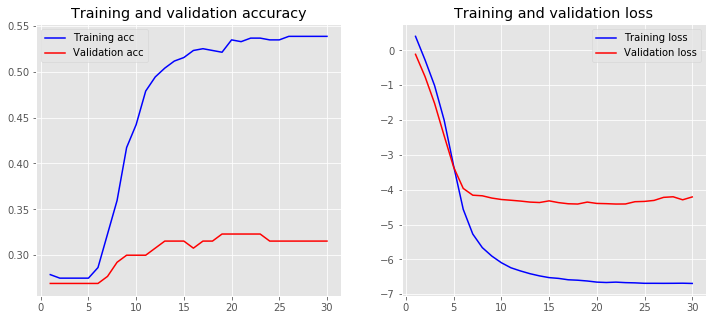

In [84]:
plot_history(history)

['29',
 'yang',
 'saat',
 'ini',
 'sedang',
 'bangun',
 'adalah',
 'bukti',
 'nyata',
 'dalam',
 'atas',
 'macet']